In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.6MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [32]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [21]:
#generators_: -divide image into batches(proces lagrge amount of data )
#Data loading
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int', #cats 0 and dogs 1
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int', #cats 0 and dogs 1
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
#Normalize-Numpy me stored hai to 0-255 ke array me hai par apan ko 0 - 1 me karna hai to normalise kartte hai hu log
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [34]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [36]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [37]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 103ms/step - loss: 1.4885 - accuracy: 0.5821 - val_loss: 0.6408 - val_accuracy: 0.6482
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5668 - accuracy: 0.7121 - val_loss: 0.5581 - val_accuracy: 0.7046
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4821 - accuracy: 0.7707 - val_loss: 0.4832 - val_accuracy: 0.7620
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4481 - accuracy: 0.7977 - val_loss: 0.4546 - val_accuracy: 0.7770
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3876 - accuracy: 0.8264 - val_loss: 0.4586 - val_accuracy: 0.7978
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3224 - accuracy: 0.8590 - val_loss: 0.5303 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2577 - accuracy: 0.8928 - val_loss: 0.5475 - val_ac

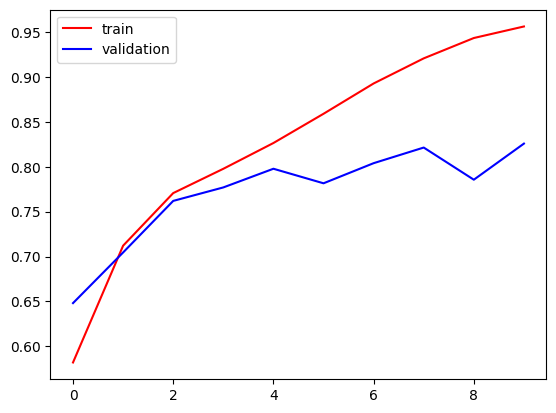

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend();
plt.show();
#loss is coming in between training and validated data therefore overfiting

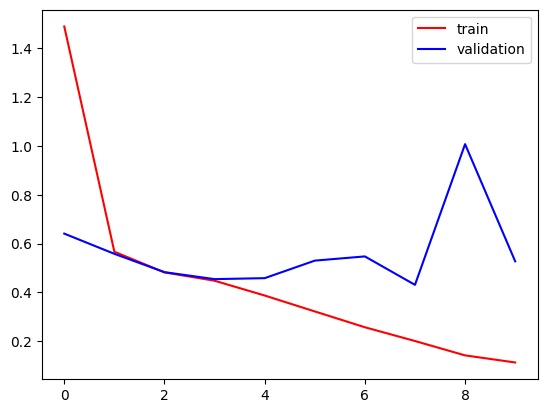

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#overfitting training daTa and test image

In [ ]:
#ways to reudce overfiting
#Add more data
#Data Augmentation
#L1/L2 regularizaaaaaaaaaaaon
#dropout
#

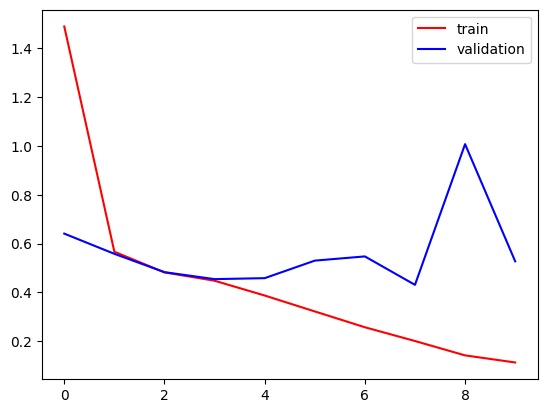

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend();
plt.show();

In [42]:
import cv2

In [52]:
test_img = cv2.imread('/content/cat.jpg')

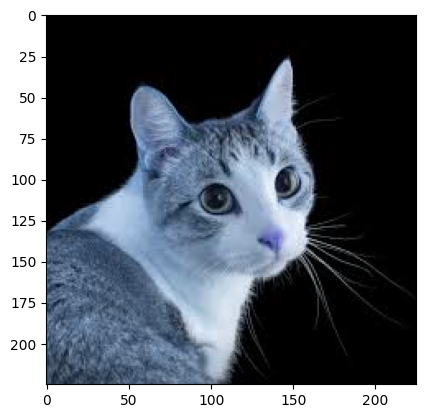

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(225, 225, 3)

In [55]:
test_img = cv2.resize(test_img,(256,256))

In [56]:
test_input = test_img.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)